<a href="https://colab.research.google.com/github/ANDRESMARTINEZG/TALLERES-TRABAJOS-VIS-/blob/main/Trabajo_Visualizaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **PROYECTO PRIMER CORTE **
Por Luz Rodriguez, David Benavides y Freddy Martinez


### IMPORTACIÓN DE LIBRERIAS Y DATOS 

Datos extraídos de la fuente 'Datos.gob.ar'

Fecha creación: 25 de septiembre de 2020

Datos actualizados por última vez: 12 de febrero de 2021

Fuente: Datos.gob.ar

In [2]:
import pandas as pd
url = 'https://raw.githubusercontent.com/ANDRESMARTINEZG/TALLERES-TRABAJOS-VIS-/main/llamados-atendidos-violencia-familiar-unificado-201701-202102.csv'
df = pd.read_csv(url)
print(df.head(5))

    caso_id  ... llamado_provincia_id
0  344552.0  ...                    2
1  344553.0  ...                    2
2  344554.0  ...                    2
3  344555.0  ...                    2
4  344556.0  ...                    2

[5 rows x 16 columns]


In [4]:
import numpy as np
import datetime as dt
from datetime import datetime
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib as cm
import matplotlib.pyplot as plt
import altair as alt
from vega_datasets import data
from math import log10

### Descripción de los datos

En esta base de datos se tiene la información de casos reportados de violencia intrafamiliar, en la base encontramos 16 variables con la siguiente información:

* caso_id: Id de los casos reportados
* llamante_descripcion: Persona que realizo la llamada y reporto el caso de violencia
* llamante_genero: Género de la persona que realizo la llamda
* llamante_vinculo_ninios_presentes: tipo de vinculo del llamante con la victima
* violencia_tipo: Tipo de violencia
* victima_edad: Edad de la victima
* victima_rango_etario: Rango de edad de la victima
* victima_genero: Género de la victima
* victima_cantidad: Cantidad de victimas reportadas en el caso
* agresor_cantidad: Cantidad de agresores reportadas en el caso
* agresor_genero: Género del agresor
* agresor_relacion_victima: Relación de la victima con el agresor
* llamado_derivacion: Información de la acciones tomadas luego de las llamadas
* llamado_fecha_hora: Fecha y hora de la llamada realizada
* llamado_provincia: Provincia en la que se origino el llamado
* llamado_provincia_id: Id de la provincia en la que se origino el llamado





In [6]:
df.dtypes

caso_id                              float64
llamante_descripcion                  object
llamante_genero                       object
llamante_vinculo_ninios_presentes     object
violencia_tipo                        object
victima_edad                          object
victima_rango_etario                  object
victima_genero                        object
victima_cantidad                       int64
agresor_cantidad                       int64
agresor_genero                        object
agresor_relacion_victima              object
llamado_derivacion                    object
llamado_fecha_hora                    object
llamado_provincia                     object
llamado_provincia_id                   int64
dtype: object

In [7]:
datos = df

In [8]:
datos.index=datos.caso_id

In [9]:
datos.shape

(36423, 16)

In [11]:
datos=datos.iloc[:,range(1,16,1)]
datos.head()

,llamante_descripcion,llamante_genero,llamante_vinculo_ninios_presentes,violencia_tipo,victima_edad,victima_rango_etario,victima_genero,victima_cantidad,agresor_cantidad,agresor_genero,agresor_relacion_victima,llamado_derivacion,llamado_fecha_hora,llamado_provincia,llamado_provincia_id
caso_id,,,,,,,,,,,,,,,
344552.0,Comisaría,Masculino,Otra/o no familiar,Física y psicológica,27,18 a 29 años,Femenino,3,1,Masculino,Pareja,La víctima no aceptó la intervención del Equip...,2017/01/01 01:37,Ciudad Autónoma de Buenos Aires,2
344553.0,Comisaría,Femenino,Sin datos,Física y psicológica,Sin dato,Sin dato,Femenino,2,1,Masculino,Hermano/a,Llamante solicitó información y/o orientación,2017/01/01 06:42,Ciudad Autónoma de Buenos Aires,2
344554.0,Víctima,Femenino,Madre,Física y psicológica,Sin dato,Sin dato,Femenino,1,1,Masculino,Pareja,Llamante solicitó información y/o orientación,2017/01/01 06:48,Ciudad Autónoma de Buenos Aires,2
344555.0,Víctima,Femenino,No hay niñas/os,Física y psicológica,Sin dato,Sin dato,Femenino,1,1,Masculino,Pareja,Llamante solicitó información y/o orientación,2017/01/01 06:54,Ciudad Autónoma de Buenos Aires,2
344556.0,Comisaría,Masculino,Otra/o no familiar,Psicológica,Sin dato,Sin dato,Masculino,1,1,Femenino,Madre,Llamante solicitó información y/o orientación,2017/01/01 07:11,Ciudad Autónoma de Buenos Aires,2


### Identificación y retiro de datos faltantes


In [12]:
datos.isnull().sum()

llamante_descripcion                  0
llamante_genero                       0
llamante_vinculo_ninios_presentes     0
violencia_tipo                       20
victima_edad                          0
victima_rango_etario                  0
victima_genero                        0
victima_cantidad                      0
agresor_cantidad                      0
agresor_genero                        0
agresor_relacion_victima              0
llamado_derivacion                    0
llamado_fecha_hora                    0
llamado_provincia                     0
llamado_provincia_id                  0
dtype: int64

In [13]:
datos=datos.dropna()

*Se encontro 20 datos faltante pertenecientes a la variable tipo de violencia, posterior a identificarlos se procedio a eliminarlos.*

### Retiro de datos pertenecientes a " Sin dato"

In [15]:
datos.victima_edad.value_counts()

Sin dato     12477
Sin dato      3137
30             675
24             618
23             607
             ...  
98               4
99               3
97               3
101              3
100              1
Name: victima_edad, Length: 104, dtype: int64

In [16]:
datos2=datos[datos.victima_edad!="Sin dato"]
datos2=datos2[datos2.victima_edad!="Sin dato "]
datos2.shape

(20789, 15)

*Se encontraron 20789 datos sin información, al ser casi la mitad de la base de datos se decide no imputar y se procede a eliminarlos, dejando en la base un total de 20446 resgistros.*

### Duplicados

In [17]:
datos2.index.duplicated().sum()

1824

In [18]:
datos2=datos2[~datos2.index.duplicated()]
datos2.shape

(18965, 15)

*Se encontraron en la base 1824 datos duplicados, posterior a esto se retiraron dejandonos con 18965 registros.*

### Tratamiento y limpieza de base por columnas

In [19]:
# Decripción de la persona que realizo la llamada
datos2.llamante_descripcion.replace({"Otra institución":"Otra Institución","Otro/a Particular":"Otro", "Otro/a particular":"Otro", "Otro/a": "Otro"},inplace=True)
datos2.llamante_descripcion.value_counts()

Comisaría           8667
Víctima             5495
Familiar            2538
Vecina/o             664
Otra Institución     572
Otro                 534
Hospital             390
NS/NC                 50
Agresor/a             47
Defensoría             8
Name: llamante_descripcion, dtype: int64

In [20]:
# Vinculos del llamante con la victima
datos2.llamante_vinculo_ninios_presentes.replace({"Hermano/a":"Hermano/o","Otra/o no familiar":"Otro/a no familiar","Otra/o familiar":"Otro familiar","Hermana/o":"Hermano/a"},inplace=True)
datos2.llamante_vinculo_ninios_presentes.value_counts()

Otro/a no familiar    6548
No hay niñas/os       5329
Madre                 3344
Otro familiar         1342
Sin datos              776
NS/NC                  683
Padre                  590
Hermano/o              208
Hermano/a              137
Padrastro                8
Name: llamante_vinculo_ninios_presentes, dtype: int64

In [21]:
# Tipo de violencia
datos2.violencia_tipo.replace({"Física, psicológica y económica":"Económica, física y psicológica","no aplica":"No aplica"},inplace=True)
datos2.violencia_tipo.value_counts()

Física y psicológica                   12607
Psicológica                             5453
Económica, física y psicológica          371
Económica y psicológica                  171
Sexual y psicológica                     159
Física, sexual y psicológica             145
Otras                                     31
Sexual, económica y psicológica           10
No es un caso de Violencia Familiar        8
No aplica                                  7
Económica, Física y psicológica            3
Name: violencia_tipo, dtype: int64

In [22]:
# Rango de la edad de la victima
datos2.victima_rango_etario.replace({"06 a 11 años":"6 a 11 años"},inplace=True)
datos2.victima_rango_etario.value_counts()

18 a 29 años      5866
30 a 39 años      4353
40 a 49 años      2781
Más de 60 años    1685
12 a 17 años      1458
50 a 59 años      1147
6 a 11 años        904
0 a 5 años         771
Name: victima_rango_etario, dtype: int64

In [23]:
# Cantidad de victimas y cantidad agresores
datos2=datos2[datos2.victima_cantidad!= 0]
datos2=datos2[datos2.agresor_cantidad!= 0]
datos2=datos2[datos2.agresor_cantidad!= 51]

In [24]:
# Relación del agresor con la victima
datos2=datos2[datos2.agresor_relacion_victima!= 'Madrastra']
datos2.agresor_relacion_victima.replace({"Hermana/o":"Hermano/a"},inplace=True)
datos2.agresor_relacion_victima.value_counts()

Pareja                   7128
Ex pareja                4809
Madre                    1667
Padre                    1459
Hijo/a                   1362
Hermano/a                 796
Otro/a no conviviente     516
Otro/a conviviente        370
Padrastro                 331
NS/NC                     318
Abuelo/a                   74
Name: agresor_relacion_victima, dtype: int64

In [25]:
# Información de la acciones tomadas luego de las llamadas
datos2.llamado_derivacion.replace({"Comunicación con los Equipos Móviles":"Comunicación con Equipos Móviles"},inplace=True)
datos2.llamado_derivacion.value_counts()

Llamante solicitó información y/o orientación                             8959
La víctima no aceptó la intervención del Equipo Móvil                     3942
No se desplazó un  Equipo móvil por tratarse de un caso fuera de CABA     2213
No había móviles y/o Equipos para realizar la intervención                1530
Desplazamiento de un Equipo Móvil a donde se encontraba la/s víctima/s    1278
Se planificó intervención para otro momento                                582
Está interviniendo o se deriva a otra institución                          321
Comunicación con Equipos Móviles                                             3
Se trata de un conflicto familiar                                            2
Name: llamado_derivacion, dtype: int64

*Se econtraron en algunas de la variables categoricas, problemas de coherencia y categorias que se repetian a causa de un carater de mas o problemas de espacios en la digitación, por lo tanto se procedio a unificar estas categorias y en otras quitarlas por ser datos atipicos.*

In [26]:
datos2['llamado_fecha_hora'] = datos2['llamado_fecha_hora'].astype('str')
datos2['llamado_fecha_hora'].dtype

dtype('O')

In [27]:
fe=pd.DataFrame(datos2["llamado_fecha_hora"].str.split(' ',expand=True))

In [28]:
datos2["llamado_fecha"]=fe.iloc[:,0]
datos2["llamado_hora"]=fe.iloc[:,1]

In [29]:
datos2=datos2.drop(["llamado_fecha_hora"],axis=1)

In [30]:
datos2.head(3)

,llamante_descripcion,llamante_genero,llamante_vinculo_ninios_presentes,violencia_tipo,victima_edad,victima_rango_etario,victima_genero,victima_cantidad,agresor_cantidad,agresor_genero,agresor_relacion_victima,llamado_derivacion,llamado_provincia,llamado_provincia_id,llamado_fecha,llamado_hora
caso_id,,,,,,,,,,,,,,,,
344552.0,Comisaría,Masculino,Otro/a no familiar,Física y psicológica,27,18 a 29 años,Femenino,3,1,Masculino,Pareja,La víctima no aceptó la intervención del Equip...,Ciudad Autónoma de Buenos Aires,2,2017/01/01,01:37
344557.0,Comisaría,Masculino,Otro/a no familiar,Física y psicológica,35,30 a 39 años,Femenino,4,1,Masculino,Pareja,La víctima no aceptó la intervención del Equip...,Ciudad Autónoma de Buenos Aires,2,2017/01/01,07:23
344559.0,Comisaría,Masculino,Otro/a no familiar,Física y psicológica,25,18 a 29 años,Femenino,1,1,Masculino,Pareja,La víctima no aceptó la intervención del Equip...,Ciudad Autónoma de Buenos Aires,2,2017/01/01,07:38


*Se procedio a separar la fecha y la hora de la variable 'llamado_fecha_hora' en dos columnas nombradas 'llamado_fecha' y 'llamado_hora' respectivamente.*

## VISUALIZACIÓN PROPUESTA 

**DESCRIPCION**

In [31]:

datos2["llamado_derivacion"].value_counts()

Llamante solicitó información y/o orientación                             8959
La víctima no aceptó la intervención del Equipo Móvil                     3942
No se desplazó un  Equipo móvil por tratarse de un caso fuera de CABA     2213
No había móviles y/o Equipos para realizar la intervención                1530
Desplazamiento de un Equipo Móvil a donde se encontraba la/s víctima/s    1278
Se planificó intervención para otro momento                                582
Está interviniendo o se deriva a otra institución                          321
Comunicación con Equipos Móviles                                             3
Se trata de un conflicto familiar                                            2
Name: llamado_derivacion, dtype: int64

In [33]:
datos2["llamante_descripcion"].value_counts()

Comisaría           8637
Víctima             5465
Familiar            2493
Vecina/o             654
Otra Institución     567
Otro                 527
Hospital             386
Agresor/a             47
NS/NC                 46
Defensoría             8
Name: llamante_descripcion, dtype: int64

In [34]:
tab1 = pd.crosstab(datos2["llamante_descripcion"],datos2["llamado_derivacion"])
tab1

llamado_derivacion,Comunicación con Equipos Móviles,Desplazamiento de un Equipo Móvil a donde se encontraba la/s víctima/s,Está interviniendo o se deriva a otra institución,La víctima no aceptó la intervención del Equipo Móvil,Llamante solicitó información y/o orientación,No había móviles y/o Equipos para realizar la intervención,No se desplazó un Equipo móvil por tratarse de un caso fuera de CABA,Se planificó intervención para otro momento,Se trata de un conflicto familiar
llamante_descripcion,,,,,,,,,
Agresor/a,0,0,2,2,41,0,2,0,0
Comisaría,2,758,128,3148,3133,1047,88,333,0
Defensoría,0,5,0,1,1,1,0,0,0
Familiar,0,35,44,66,1505,75,743,25,0
Hospital,0,125,22,44,73,49,7,66,0
NS/NC,0,1,2,0,36,1,6,0,0
Otra Institución,0,131,26,87,181,71,23,48,0
Otro,0,28,13,25,304,4,137,15,1
Vecina/o,0,26,25,20,356,23,199,5,0


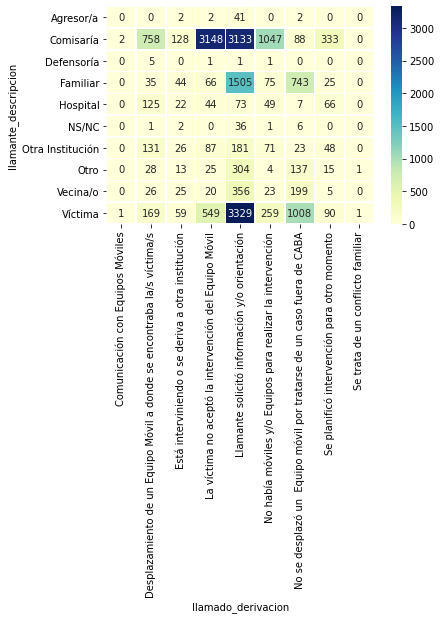

In [36]:
ax = sns.heatmap(tab1,
                 annot=True, 
                 fmt="d",
                 linewidths=.5,
                 cmap="YlGnBu")

### VIS QUE SE DECIDE HACER: MAPA DE CALOR

**¿Qué?**
* Como ya fue mencionado dentro de la descripción, la VIS tiene como objetivo el análisis de dos
variables donde en una nos muestra la descripción del llamante donde nos dice si es alguien de la
comisaria, defensoría, vecino, familiar entre otras y por otro lado está a lo que derivo esta llamada
en pocas palabras si la victima adquirió ayuda y orientación por los agentes o no, este tipo de data
set es de tabla donde se relacionan sus ítems en cuanto a sus atributos donde el conjunto de datos
es estático y nos dice a través de esa unión de características los niveles cuantitativos y también
mediante los fiels el estado de esas dos variables que tan calientes o frías están estas también
relacionadas a través de colores.

**¿Por qué?**
* Como bien se dijo en la descripción el usuario requiere ver el tipo de acción que tiene
la victima contra la violencia es por eso que se enfoca esta visualización al tipo de presentación
donde nos describe como derivan la correlación o para ser más preciso el tipo de dependencia de
estas dos variables es por eso que el tipo de consulta resulta siendo una especie de resumen, acá
podemos ver una situación quizá irracional porque cuando el llamante es el victimario muchas
veces la victima llega a un arreglo y ayuda con los agentes que se llamaron y a pesar de que la
comisaria o defensoría llame no se llega a un consenso como se esperaría entre la víctima y los
agentes aunque aún así es tiene niveles altos donde se imparte “verdadera justicia”

**¿Cómo?** 
* La codificación visual que utiliza esta pieza es un arreglo express donde muestra datos
numéricos puntuales donde también utiliza diferentes subcaracteristicas y a través de la
saturación nos muestran la frecuencia según las características contrarrestadas.

**Marca:**
* El tipo de marca que tiene esta visualización es de área donde nos muestra a nivel
numérico y de color el nivel volumen o crecimiento que tiene esa área

**Canal :** 
* En cuanto a este ítem la pieza proporciona dos tipos de colores de saturación claros donde
lo enunciado en el color naranja o rojizo es lo que en la pieza determina las partes que mayor
frecuencia tienen y en azul ya resalta lo menos característico o frecuentado según la relación
llamante y derivación, entonces se puede decir vagamente que el color describe la frecuencia por
ejemplo como en este caso cuando un familiar llama toma un color casi hacia el azul donde nos
muestra que no tiene mucha relevancia entre cómo reacciona la victima si el que lo apoya es un
familiar pero podemos ver que se toma un color rojizo si la comisaria tiene apoyo con la víctima.

**Reglas Generales:** 
* La pieza tiene una justificación adecuada donde representa de forma
sobresaliente los datos, de forma cognitiva y de percepción tiene una armonía adecuada donde el
usuario puede persuadir cada parte de la pieza sin que se le pierda información aunque seria bueno buscar un metodo para recortar las variables,a través de los
colores ayuda a representar la frecuencia y también estudia en cada caso que tipo de soluciones se pueden implantar cuando se correlaciona quizá hospital y aplazamiento o planificación de intervención de otro momento donde el usuario podría implementar como mayor educación y acompañamiento en los hospitales